1. Preprocesamiento de datos

Importando datos 

In [1]:
import os
import glob
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

data = []

#Cargar los datos con OpenCv
paths = ["C:/Users/Kevin Prieto/Desktop/Probando Jupyter/Ejercicios/CNN Tumor Cerebral/Dataset Tumor Cerebral/Training/","C:/Users/Kevin Prieto/Desktop/Probando Jupyter/Ejercicios/CNN Tumor Cerebral/Dataset Tumor Cerebral/Testing/"]

#Mostrar imagen
def imshow(img):
    fig,ax = plt.subplots(1,1,figsize = (5,5))
    ax.imshow(img)
    plt.show()

#agregar las etiquetas de salida dadas las carpetas con su nombre
possible_labels = os.listdir(paths[0])

Agregando las imagenes a una lista de datos

In [2]:
for i, path in enumerate(paths):
    for label_int, label_str in enumerate(possible_labels):
        for filename in glob.glob(path+label_str+"/*.jpg"):
            img = cv2.imread(filename)
            data.append([label_int, cv2.resize(img,(320,320)) ])

print(len(data))

7023


Extrayendo de la lista de datos las imagenes de entrenamiento, testing y validacion y guardandolos en un array de Numpy

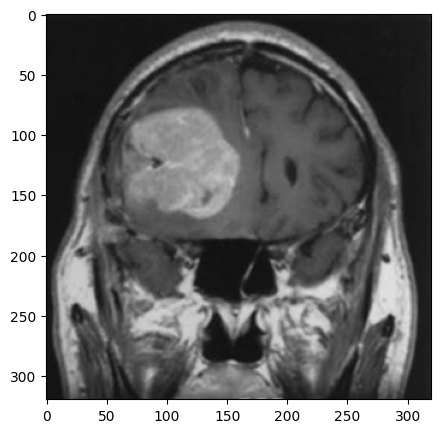

meningioma


In [3]:
#Se Barajea el arreglo data para que no inserte los datos por carpetas
random.Random(0).shuffle(data)

#Se crea arreglos para los conjuntos de validacion, tewsting y entrenamiento
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

#Se recorre la lista data para agregar las imagenes a sus correspondientes arreglos
for i,sample in enumerate(data):
    label= sample[0]
    img = sample[1]
    if i <= 0.8*len(data):
        x_train.append(img)
        y_train.append(label)
    elif i >0.8*len(data) and i <= 0.9*len(data):
        x_val.append(img)
        y_val.append(label)
    else:
        x_test.append(img)
        y_test.append(label)

#Convirtiendo los arrays en arreglos de NumPy para Tensorflow
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

#Mostrar Imagen en la pos 0
imshow(x_train[0])
print(possible_labels[y_train[0]])

2. Definicion y entrnamiento del modelo

In [4]:
import tensorflow as tf

y_trainOneHot = tf.one_hot(y_train,len(possible_labels))
y_valOneHot = tf.one_hot(y_val,len(possible_labels))
y_testOneHot = tf.one_hot(y_test,len(possible_labels))

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [6]:
def cnn_model():
    model = Sequential()
    model.add(Input(shape=(320, 320, 3)))
    model.add(Convolution2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(50,activation="relu"))
    model.add(Dense(4, activation="softmax"))
    model.compile(optimizer= "SGD",loss= "categorical_crossentropy", metrics =["accuracy"] )
    return model

In [7]:
model = cnn_model()
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 318, 318, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 159, 159, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 808992)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │    40,449,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,450,750 (154.31 MB)

 Trainable params: 40,450,750 (154.31 MB)

 Non-trainable params: 0 (0.00 B)

None
